In [1]:
from functions import *

import warnings
warnings.filterwarnings('ignore')

### Import a Dataset

In [2]:
## load dataset require input dataset and string user
data= loaddataset('dataset.csv', 'Z8RsBpxhnkebK5fvahVCmfV7icO2')

In [3]:
data = preprocess(data,1)

### The final dataset will be: 

In [4]:
data.head()

,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
823,77,0,0,0,0,0,90,0,0,0,0,0,0
824,75,49,0,0,0,0,90,0,0,0,0,0,0
825,73,71,0,0,0,0,86,0,0,0,0,0,0
826,89,650,0,0,0,0,82,0,0,0,0,0,0
827,97,393,0,0,0,0,79,0,0,0,0,0,0


### Let’s create our model. We are trying to predict a patient diabetes value. This coincides with the ‘sugarValue’ column, which will be our independent variable. We’ll use all the other columns as features for our model.

### We’ll use train-test-split to split the data into training data and testing data, and create a random forest model.


In [6]:
X = data.drop('sugarValue', axis=1)
y = data['sugarValue']

## Create a windows, compute the predictions and calculate the MAE and RMSE for each window. Save the values in a dataset. 


In [7]:
window = prediction(data,2,1, X, y)

--- 3004.126023054123 Seconds for computation ---


### The dataset will show :

#### - Current train (the current window values) 
#### - Current test (the predicted values)
#### - MSE the average of the forecast error values
#### - RMSE (root mean square error)
#### - Predictive horizons (PHs) for each window.

In [8]:
window.head()

,Current train,Current test,MSE,RMSE,Interval
0,From: 823 to: 838,From: 839 to: 839,16.0,4.0,15Min 3PSW
1,From: 824 to: 839,From: 840 to: 840,49.0,7.0,15Min 3PSW
2,From: 825 to: 840,From: 841 to: 841,100.0,10.0,15Min 3PSW
3,From: 826 to: 841,From: 842 to: 842,1.0,1.0,15Min 3PSW
4,From: 827 to: 842,From: 843 to: 843,169.0,13.0,15Min 3PSW


## Plot the all RMSE in a boxplot, from 3h window to 36h window.


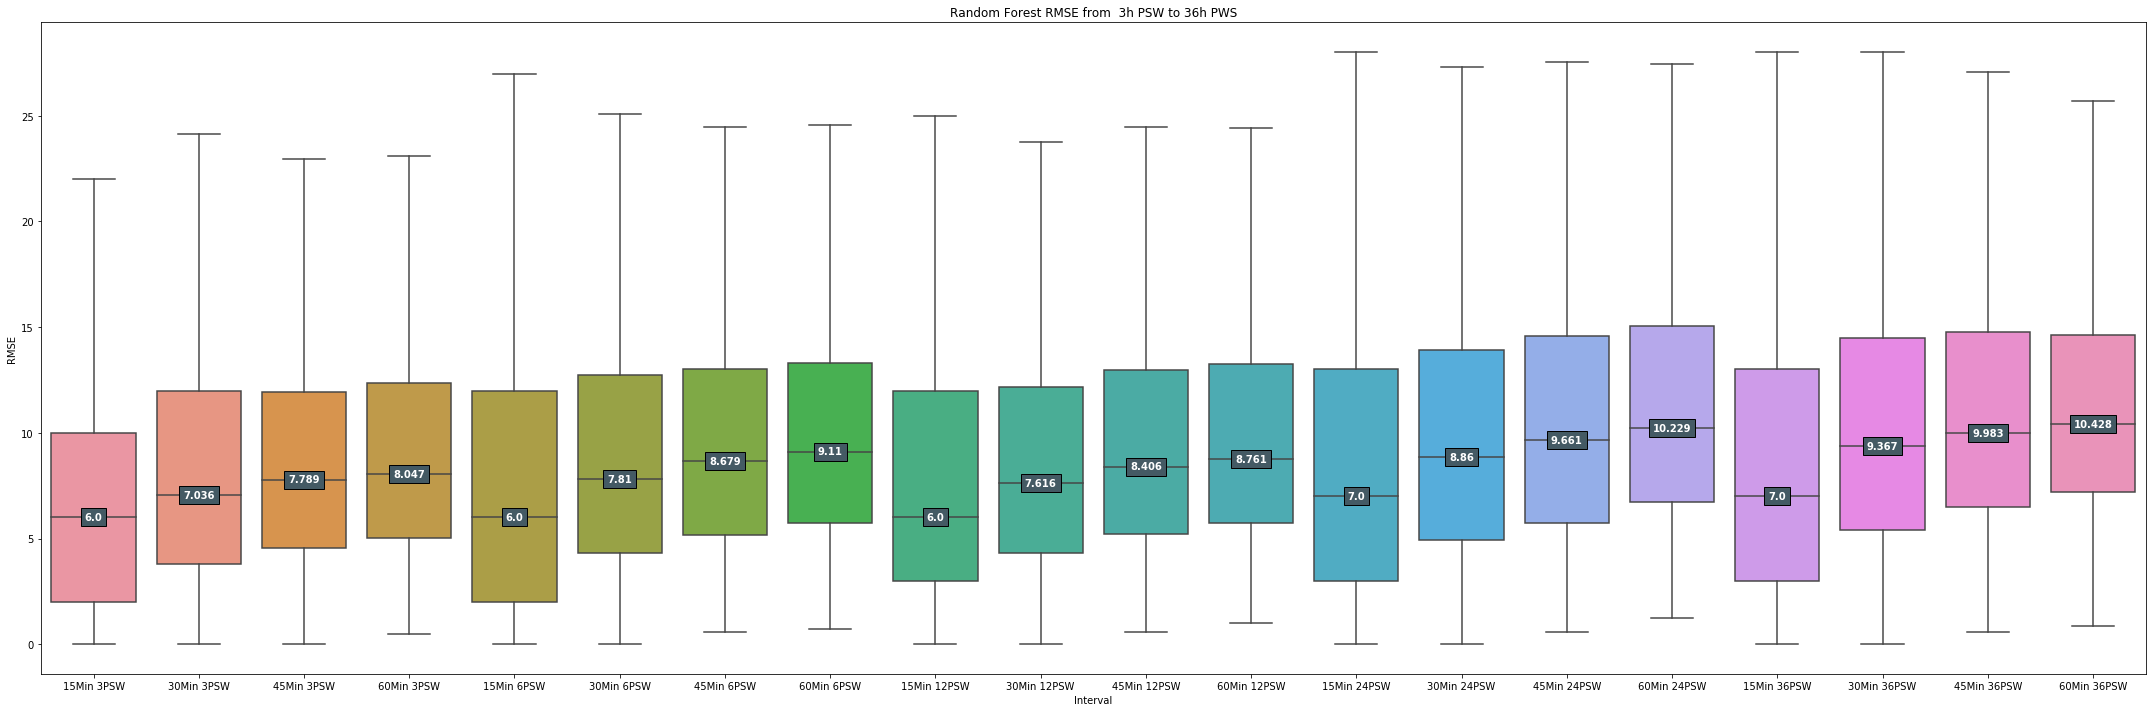

In [9]:
boxplot(window, "Random Forest", 3, 36)

## Let s try to increment the window from 36 hours max, to 72 hours max and increse the PH from 60min until 3 hours  


In [10]:
windowLong = prediction(data,2,2, X, y)

--- 4326.866644859314 Seconds for computation ---


In [11]:
windowLong.head()

,Current train,Current test,MSE,RMSE,Interval
0,From: 823 to: 1032,From: 1033 to: 1033,16.0,4.0,15Min 48PSW
1,From: 824 to: 1033,From: 1034 to: 1034,1.0,1.0,15Min 48PSW
2,From: 825 to: 1034,From: 1035 to: 1035,25.0,5.0,15Min 48PSW
3,From: 826 to: 1035,From: 1036 to: 1036,225.0,15.0,15Min 48PSW
4,From: 827 to: 1036,From: 1038 to: 1038,16.0,4.0,15Min 48PSW


## Plot the RMSE in a box plot

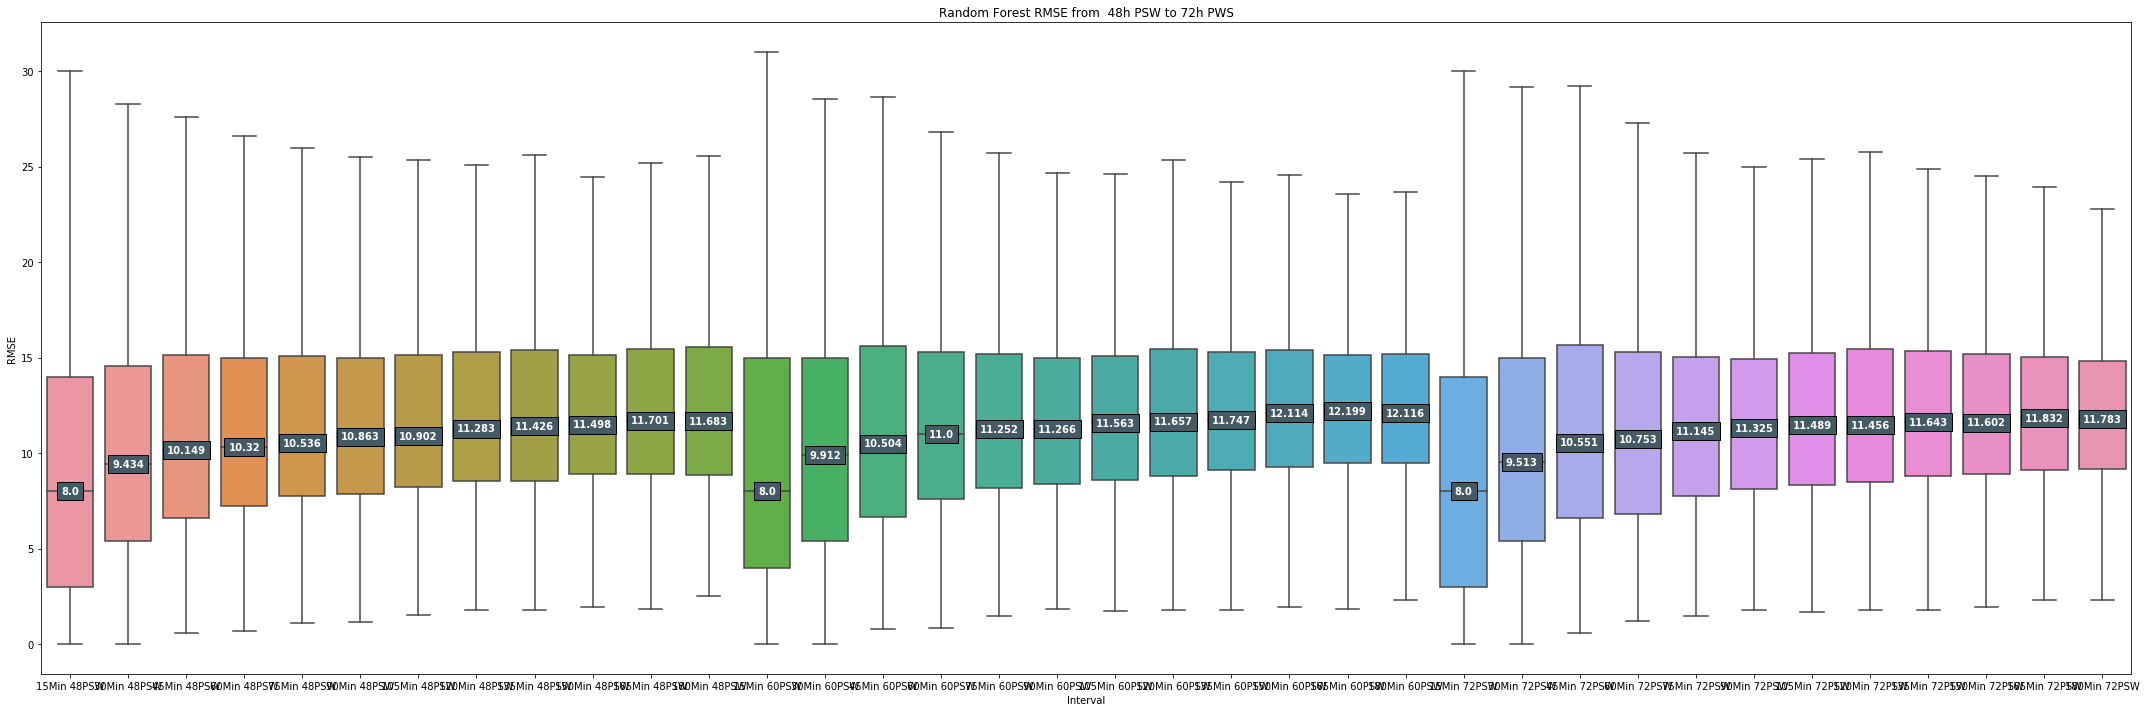

In [12]:
boxplot(windowLong, "Random Forest",48,72)